Taller final

Morales, Santiago

Torres, Juan Manuel

Para construir portafolios con activos del mercado existen diversas maneras de seleccionar las medidas de desempeño que se desea tener sobre las inversiones.

En este proyecto se tiene como fin generar distintos portafolios y por medio de dos métodos distintos aplicados a cada uno de los portafolios observar la similitud de estos. 

Para este proyecto 5 activos fueron seleccionados: Atlassian (TEAM), Kellogg’s (K), NVIDIA (NVDA), AMD (AMD) y Tesla (TSLA). Se calcularon sus retornos entre los meses de enero de 2018 y diciembre de 2022. 

Estos activos fueron seleccionados con el supuesto de que en caso de permitir las ventas en corto se apalancarán los 3 mejores entre estos (NVDA, AMD y TSLA) con ventas en corto de los activos que obtuvieron el peor rendimiento (TEAM y K), sin embargo, en estos modelos existe una restricción que no permite los cortos y se observará el comportamiento en este entorno. 

Los métodos que se van a usar para calcular cada uno de estos son: 1.  usando los precios históricos de las acciones y 2. generar un número aleatorio de portafolios con la finalidad de que el promedio de estos sea similar al método 1.

Los objetivos principales del proyecto son:
-	Comprobar la similitud de los portafolios al usar dos métodos 
-	Observar los cambios que hay entre cada portafolio
-	Observar la distribución de los pesos cuando hay restricciones en los cortos



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp
from scipy import stats
from scipy.stats import norm
!pip install --quiet yfinance
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [2]:
activos = ["TEAM","K","NVDA","AMD","TSLA"] 
precios = yf.download(activos, start="2017-12-01",end="2022-12-31",interval="1Mo")['Adj Close']
retornos = np.log(precios/precios.shift()).dropna()
mu = retornos.mean()
cov = retornos.cov()
sigma = retornos.std()

[*********************100%***********************]  5 of 5 completed


In [ ]:
pd.DataFrame(precios)

,AMD,K,NVDA,TEAM,TSLA
Date,,,,,
2017-12-01,10.280000,56.421368,47.878796,45.520000,20.756666
2018-01-01,13.740000,56.529278,60.819675,53.990002,23.620667
2018-02-01,12.110000,54.944023,59.879421,54.290001,22.870667
2018-03-01,10.050000,53.956375,57.339237,53.919998,17.742001
2018-04-01,10.880000,49.282986,55.682861,55.980000,19.593332
...,...,...,...,...,...
2022-08-01,84.870003,70.940269,150.830948,247.660004,275.609985
2022-09-01,63.360001,68.488503,121.302292,210.589996,265.250000
2022-10-01,60.060001,75.528091,134.912567,202.729996,227.539993


In [ ]:
pd.DataFrame(retornos)

,AMD,K,NVDA,TEAM,TSLA
Date,,,,,
2018-01-01,0.290111,0.001911,0.239241,0.170647,0.129255
2018-02-01,-0.126280,-0.028444,-0.015580,0.005541,-0.032267
2018-03-01,-0.186459,-0.018139,-0.043348,-0.006839,-0.253920
2018-04-01,0.079354,-0.090597,-0.029313,0.037493,0.099255
2018-05-01,0.232657,0.089117,0.114527,0.130602,-0.031698
2018-06-01,0.087800,0.089897,-0.061926,-0.020110,0.186043
2018-07-01,0.201156,0.016466,0.033049,0.146858,-0.140021
2018-08-01,0.317114,0.010643,0.136528,0.217576,0.011737
2018-09-01,0.204780,-0.017129,0.001758,0.065885,-0.130439


In [ ]:
resumen = pd.concat([mu, sigma ], axis=1)
resumen.set_axis(["Retornos","Volatilidades"], axis=1)

,Retornos,Volatilidades
AMD,0.030677,0.172335
K,0.003740,0.052844
NVDA,0.018595,0.145484
TEAM,0.017320,0.127523
TSLA,0.029680,0.196036


Mínima Varianza Global

In [ ]:
n= len(mu)
x = cp.Variable(n)
objetivo = cp.Minimize(cp.quad_form(x, cov))
restricciones = [cp.sum(x) == 1, x >= 0]
prob = cp.Problem(objetivo, restricciones)
prob.solve()
wpmvg = x.value
wpmvg

array([7.67112105e-22, 8.35370476e-01, 2.43525651e-02, 1.40276958e-01,
       3.28092230e-22])

Mínima varianza global random

In [ ]:
port_rand = 100000
weights = np.zeros((port_rand, n))

for i in range(port_rand):
    w = np.random.random(n)
    w = w / np.sum(w)           
    weights[i,:] = w

In [ ]:
rand_rpmvg = weights @ mu
rand_sigmamvg = np.zeros(port_rand)
for i in range(port_rand):
  rand_sigmamvg[i] = np.sqrt(weights[i,:].T @ cov @ weights[i,:])

In [ ]:
mvg_portfolio = np.argmin(rand_sigmamvg)
mvg_weights = weights[mvg_portfolio,:]
wpmvg = wpmvg.round(3)
mvg_weights = mvg_weights.round(3)
mvg_weights, wpmvg

(array([0.023, 0.788, 0.017, 0.155, 0.017]),
 array([0.   , 0.835, 0.024, 0.14 , 0.   ]))

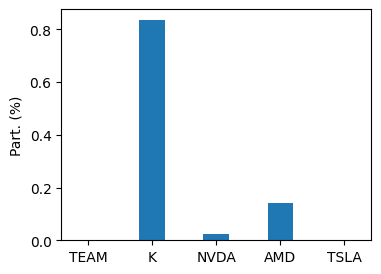

In [ ]:
plt.figure(figsize = (4, 3))
plt.bar(activos, wpmvg, width = 0.4)
plt.ylabel("Part. (%)")
plt.show();

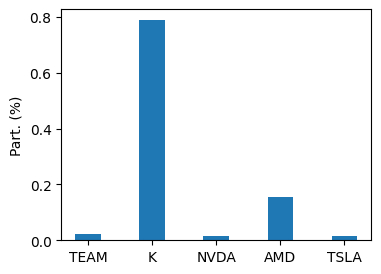

In [ ]:
plt.figure(figsize = (4, 3))
plt.bar(activos, mvg_weights, width = 0.4)
plt.ylabel("Part. (%)")
plt.show();

En ambas gráficas el activo que más peso obtiene es Kellogg's, que curiosamente es el que menor retorno tiene. Se confirma la similitud entre los métodos, pues las gráficas son bastante parecidas.

Sharpe

In [4]:
n = len(mu)
x = cp.Variable(n)
objetivo = cp.Minimize(cp.quad_form(x, cov))
restricciones = [x @ mu == 1, x >= 0]
prob = cp.Problem(objetivo, restricciones)
prob.solve()
wpt = x.value/x.value.sum()
wpt

array([3.05933654e-01, 2.47948877e-01, 5.11977048e-24, 2.41164104e-01,
       2.04953364e-01])

In [5]:
# Retornos históricos del portafolio tangente:
ret_port = retornos @ wpt
rpt = ret_port.mean()
sigmapt = ret_port.std()
rpt*12, sigmapt*np.sqrt(12)

(0.24687000108772128, 0.3271112921335376)

Sharpe Random

In [ ]:
port_rand = 100000
weights = np.zeros((port_rand, n))

for i in range(port_rand):
    w = np.random.random(n)
    w = w / np.sum(w)           
    weights[i,:] = w    

In [ ]:
rand_rpt = weights @ mu
rand_sigmapt = np.zeros(port_rand)
for i in range(port_rand):
  rand_sigmapt[i] = np.sqrt(weights[i,:].T @ cov @ weights[i,:])

In [ ]:
sharpe_ratio = rand_rpt / rand_sigmapt
tangent_portfolio = np.argmax(sharpe_ratio)
tangent_weights = weights[tangent_portfolio,:]
wpt = wpt.round(3)
tangent_weights = tangent_weights.round(3)
tangent_weights, wpt

(array([0.311, 0.231, 0.006, 0.25 , 0.203]),
 array([0.306, 0.248, 0.   , 0.241, 0.205]))

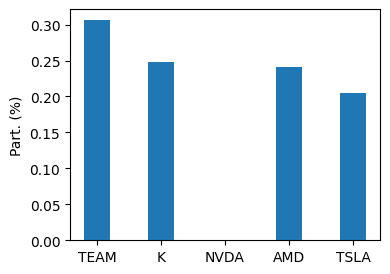

In [ ]:
plt.figure(figsize = (4, 3))
plt.bar(activos, wpt, width = 0.4)
plt.ylabel("Part. (%)")
plt.show();

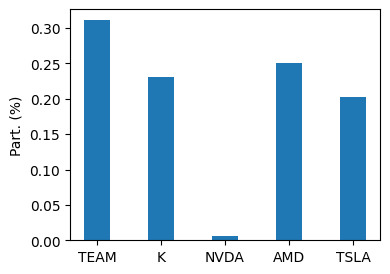

In [ ]:
plt.figure(figsize = (4, 3))
plt.bar(activos, tangent_weights, width = 0.4)
plt.ylabel("Part. (%)")
plt.show();

En el caso del portafolio tangente de Sharpe, se distribuyeron los pesos de manera más uniforme, siendo NVIDIA la que menos peso obtuvo; prácticamente nada. Además ambas gráficas son muy similares, por lo que se confirma que ambos métodos obtienen resultados similares.

VaR

In [6]:
alpha2 = 0.05                               
VaRp = rpt - norm.ppf(1-alpha2)*sigmapt
VaRp

-0.1347492124513357

VaR random

In [7]:
n_port = 100000                            
ma_pt = np.random.normal(rpt,sigmapt, n_port)
VaR_sim = ma_pt.mean() - norm.ppf(1-alpha2)*ma_pt.std()
VaRp, VaR_sim

(-0.1347492124513357, -0.13519128416553625)

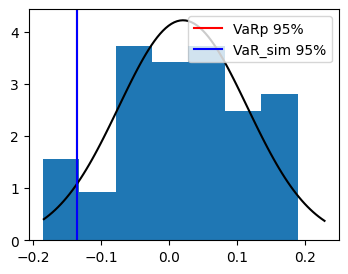

In [8]:
plt.figure(figsize=(4,3))
plt.hist(ret_port, bins='sturges',density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin*0.9, xmax*1.1, 100)
p = norm.pdf(x, rpt, sigmapt)
plt.plot(x, p, 'k')                               
plt.axvline(VaRp, color='r', label='VaRp 95%')
plt.axvline(VaR_sim, color='b', label='VaR_sim 95%')
plt.legend(loc='upper right')
plt.show()

En la gráfica del VaR no se aprecia la diferencia entre las lineas que indican el riesgo. Se confirma la similitud entre los métodos.

Omega

Omega Monte Carlo

In [ ]:
t = len(retornos.iloc[:,1])
rand_returns = np.zeros((t,port_rand))
for i in range(port_rand):
  rand_returns[:,i] = retornos @ weights[i,:]

In [ ]:
h=0
omega_port = np.zeros(port_rand)
for i in range(port_rand):
  excesos = rand_returns[:,i]-h
  pos_ret = excesos[excesos>h].sum()
  neg_ret = excesos[excesos<h].sum()
  omega_port[i] = pos_ret / (-neg_ret )

In [ ]:
omega_portfolio = np.argmax(omega_port)
omega_weights = weights[omega_portfolio,:]
omega_weights

array([0.37602788, 0.17811974, 0.00502245, 0.21927906, 0.22155087])

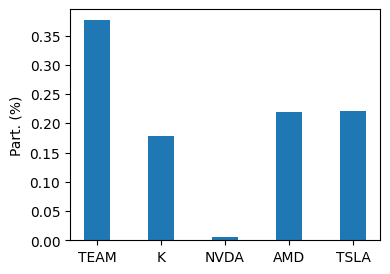

In [ ]:
plt.figure(figsize = (4, 3))
plt.bar(activos, omega_weights, width = 0.4)
plt.ylabel("Part. (%)")
plt.show();

En esta gráfica se le asignó más peso a Atlassian, mientras que Kellogg's, AMD y Tesla obtuvieron pesos similares. A Nvidia no se le asigno practicamente peso.

Sortino

In [ ]:
n = len(mu)
x = cp.Variable(n)
target = 0.05

rneg = retornos[retornos < target ]
objetivo = cp.Minimize(cp.quad_form(x, rneg.cov()))
restricciones = [cp.sum(x) == 1, x >= 0]
prob = cp.Problem(objetivo, restricciones)
prob.solve()

ws = x.value
ws.round(10)


array([ 0.        ,  0.77003394, -0.        ,  0.10892777,  0.12103829])

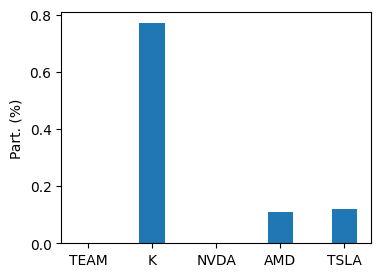

In [ ]:
plt.figure(figsize = (4, 3))
plt.bar(activos,ws, width = 0.4)
plt.ylabel("Part. (%)")
plt.show();

In [ ]:
t = len(retornos.iloc[:,1])
rand_returns = np.zeros((t,port_rand))
for i in range(port_rand):
  rand_returns[:,i] = retornos @ weights[i,:]

In [ ]:
h=0
sort_port = np.zeros(port_rand)
for i in range(port_rand):
  w = np.random.random(n)
  w = w / np.sum(w)   
  excesos = rand_returns[:,i]-h
  port_ret = np.sum(mu*w)
  neg_ret = excesos[excesos<h].sum()
  sort_port[i] = port_ret / (-neg_ret )

In [ ]:
sort_portfolio = np.argmax(sort_port)
sort_weights = weights[sort_portfolio,:]
sort_weights, ws.round(3)

(array([0.0397751 , 0.784644  , 0.03263648, 0.10409188, 0.03885254]),
 array([ 0.   ,  0.77 , -0.   ,  0.109,  0.121]))

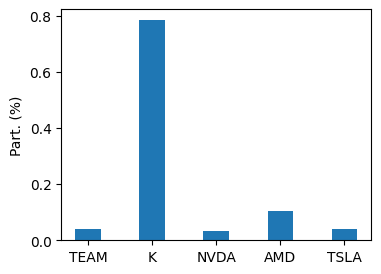

In [ ]:
plt.figure(figsize = (4, 3))
plt.bar(activos,sort_weights, width = 0.4)
plt.ylabel("Part. (%)")
plt.show();

En ambas gráficas del portafolio de Sortino al activo que más peso se le asignó fue Kellogg's, a las demás se les asignó bastante poco. Las gráficas son muy similares, lo que indica la similitud de los dos métodos.

Los resultados arrojados por el modelo fueron: en 3 de los portafolios se invierte una mayor cantidad en Kellogg's, en dos de los portafolios se diversifica la inversión en 4 de los activos, en ningún portafolio se invierte en envidia.

El modelo muestra portafolios con diferentes niveles de riesgo y de retorno, el usuario puede elegir entre estos dependiendo de su nivel de adversidad al riesgo.